<a href="https://colab.research.google.com/github/JsonLin117/-/blob/main/ariculturual_material.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#比賽方式: 在指定時間內，針對給定的題目與資料集，進行**資料清理轉換**與**AI模型訓練**，時間終了後，使用訓練好的模型對驗證資料集執行推論，最後比較各組AI模型的準確度. 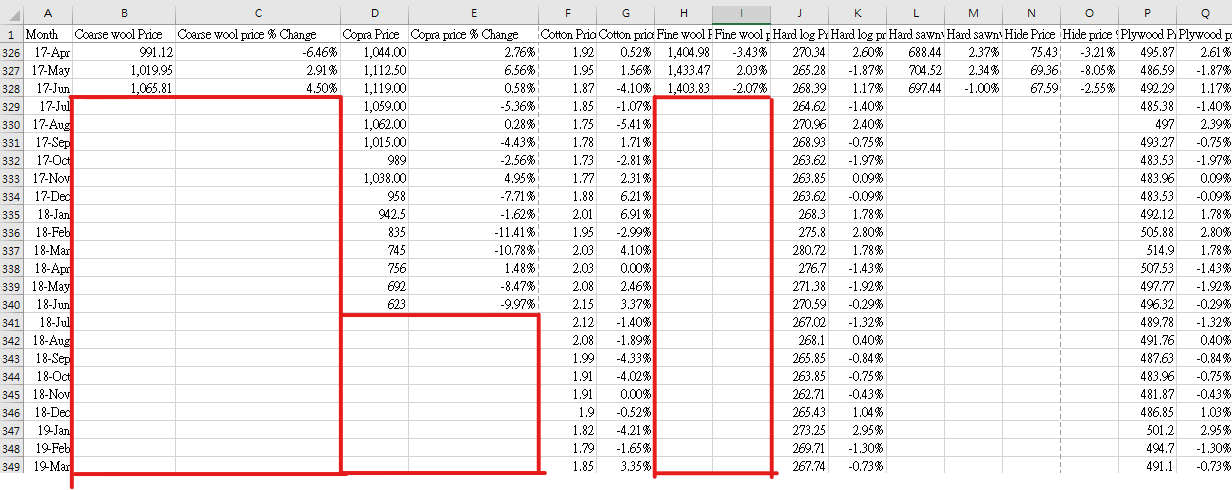收到Dataset 可以用純手工去判斷數據集裡面哪些資料需要調整 譬如說缺失值需要填滿 有百分比的欄位要把%轉換為數字


# 或者用Python/R 去做數據預處理 (檢查缺失值, 數據類型轉換, 百分比符號轉換)

### **以下用Python的方法演示一次 如何用Python 做數據預處理以及分析數據**

In [51]:
# import 需要用到的modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# 將csv檔/excel讀取進DataFrame
df = pd.read_csv('agricultural_raw_material.csv')
# 計算每一列有多少欄位有缺失值
missing_values = df.isnull().sum()
print(missing_values)

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64


### 以下只以'Coarse wool Price'欄位(粗線羊毛的價格)做示範

In [68]:
# 首先，去除可能的非數字字符，比如逗號
df['Coarse wool Price'] = df['Coarse wool Price'].str.replace(',', '')
# 將字符串轉換為浮點數, 無法轉換成數字的則轉成NaN
df['Coarse wool Price'] = pd.to_numeric(df['Coarse wool Price'], errors='coerce')
# 將粗線羊毛價格的平均值, 標準差, 最小值, 最大值, 以及四分位數顯示出來去觀察該筆數據極端值距離平均值大不大
describe_stats = df['Coarse wool Price'].describe()
print(describe_stats)

count     327.000000
mean      626.333731
std       299.638838
min       247.090000
25%       369.620000
50%       525.070000
75%       847.120000
max      1391.470000
Name: Coarse wool Price, dtype: float64


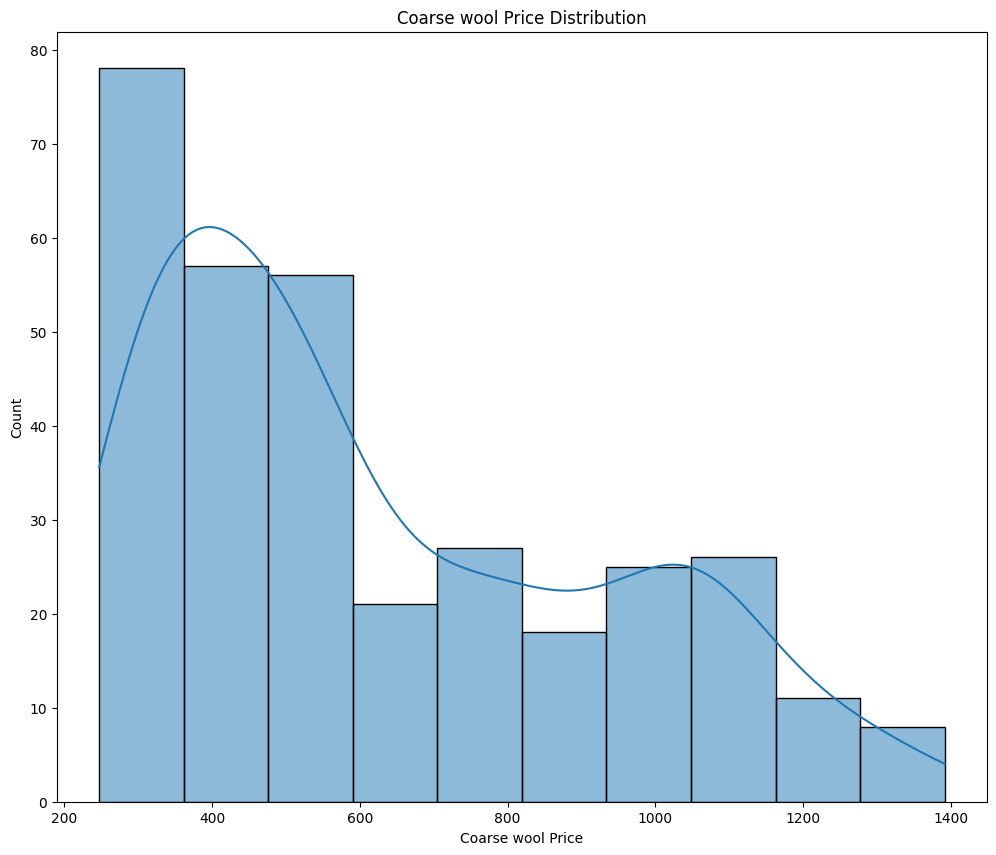

In [69]:
# 視覺化粗線羊毛價格的分布圖
plt.figure(figsize=(12, 10))
sns.histplot(df['Coarse wool Price'].dropna(), kde=True)
plt.title('Coarse wool Price Distribution')
plt.show()

In [65]:
# 可能還會用到的分析工具
'''
# 箱形圖
plt.boxplot(df['Coarse wool Price'])
plt.show()
sns.boxplot(y=df['Coarse wool Price'])
plt.show()
# 變異數和標準差
variance = df['Coarse wool Price'].var()
std_deviation = df['Coarse wool Price'].std()
# 相關分析
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()
'''

"\n# 箱形圖\nplt.boxplot(df['Coarse wool Price'])\nplt.show()\nsns.boxplot(y=df['Coarse wool Price'])\nplt.show()\n# 變異數和標準差\nvariance = df['Coarse wool Price'].var()\nstd_deviation = df['Coarse wool Price'].std()\n# 相關分析\ncorrelation_matrix = df.corr()\nsns.heatmap(correlation_matrix, annot=True)\nplt.show()\n"

In [70]:
# 計算偏度&峰度
skewness = df['Coarse wool Price'].skew()
kurtosis = df['Coarse wool Price'].kurtosis()
print('skewness:', skewness)
print('kurtosis:', kurtosis)

skewness: 0.7000388665525954
kurtosis: -0.7016585233452872


## 根據直方圖 分布有一點向右的偏態(右側尾部較長)

## mean 為 626.33

## 中位數為 525.07

## 偏態值為 0.7

## 偏態0.7表示分布有輕微右偏 但沒有非常顯著 Normally, 偏態值小於|1|是輕微偏態

## 直方圖和描述性統計表明分佈的峰值（最多數據集中的位置）位於平均值左側，即大部分數據低於平均值

## 由於偏態不是特別顯著 用平均值或中位數填充缺失值

## 但考慮到存在輕微的偏態，使用中位數可能會更好一些，因為它對極端值的影響較小

In [59]:
# 用中位數填充缺失值
df['Coarse wool Price'] = df['Coarse wool Price'].fillna(df['Coarse wool Price'].median())

# 以上大概是第二場黑克松需要做的事
## 比賽方式: 在指定時間內，針對給定的題目與資料集，進行**資料清理轉換**與**AI模型訓練，時間終了後，使用訓練好的模型對驗證資料集執行推論，最後比較各組AI模型的準確度
## 後面的AI模型訓練 & 使用訓練好的模型對驗證資料集執行推論 是用公司給的軟體去做 所以是No-Coding 因為前面的資料清理轉換手工也能做到 但是就是花費久且可能轉換的值會導致與Raw Data偏差太大 最後模型就會不準確

## 下面則是用Code去做AI模型訓練

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [72]:
# 確保 'Month' 列是日期格式，並將其設為索引
df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')
df.set_index('Month', inplace=True)

In [73]:
# 對"Coarse wool Price" 做時間序列分解
result = seasonal_decompose(df['Coarse wool Price'].dropna(), model='additive', period=12)

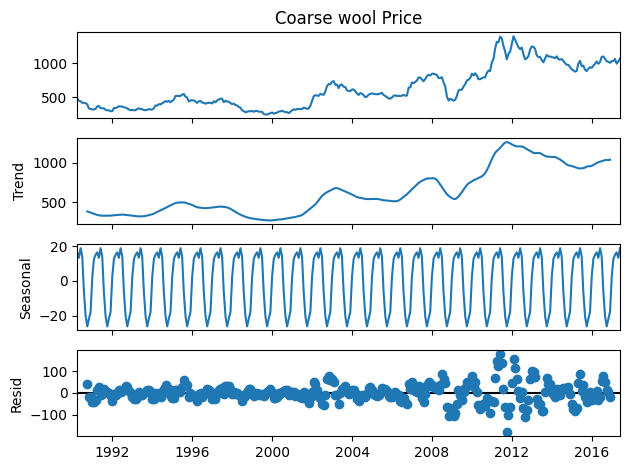

In [79]:
# 視覺化時間序列分解的result
result.plot()

plt.show()

## 由上圖可得知粗羊毛價格在長期來看有一直上漲的趨勢 尤其在2012年上漲幅度最大
## 且羊毛價格的波動是季節性的 在一年內規律性的變化
## 2012年 Residual波動很大 表示2012年的羊毛價格無法由趨勢(Trend)或是季節性(Seasonal)來解釋
## 可能的原因無法得知要了解當時發生的國際情勢與市場經濟 但可以推測可能是因為市場經濟或政策的變化導致市場價格的波動/ 羊毛在那一年的供需可能有變化(有可能那年羊毛因為什麼原因供給量變少又或者消費者對於羊毛的需求增加) / 也有可能因為自然災害影響羊毛的產量(紐西蘭火災阿之類的)

In [80]:
# 預測未來4年的羊毛價格
# 為未來四年建立相應的時間特徵
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [89]:
# 最後的數據日期
last_date = df.index[-1]

In [90]:
# 建立未來四年的日期範圍
future_dates = pd.date_range(start=last_date, periods=49, freq='M')[1:]  # 排除最後一個已有的日期
df.dropna(subset=['Coarse wool Price'], inplace=True)

In [91]:
# 為未來日期建立年份和月份的特徵
future_data = pd.DataFrame({'Year': future_dates.year, 'Month_Num': future_dates.month}, index=future_dates)

In [92]:
# 用隨機森林回歸模型預測價格
future_predictions = model.predict(future_data)

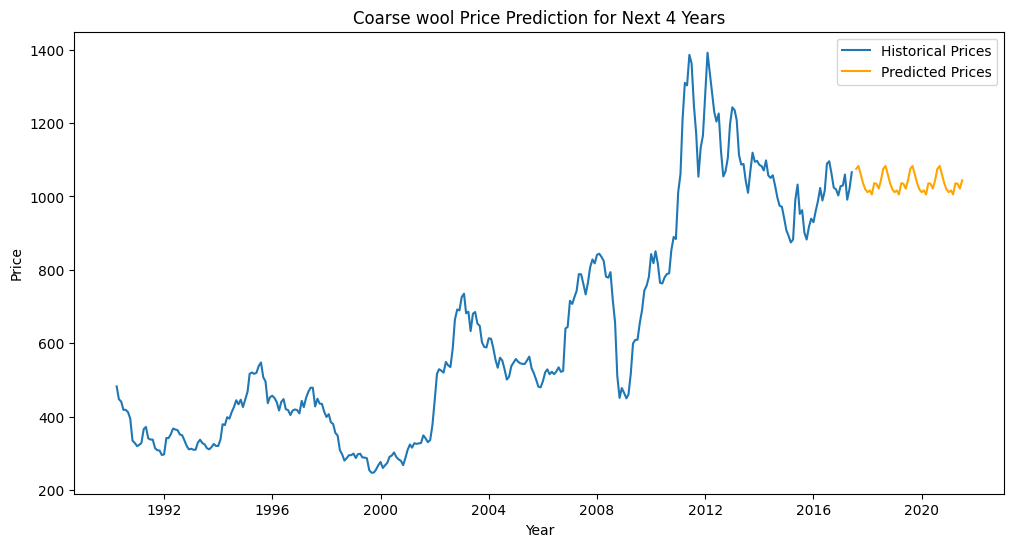

In [93]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Coarse wool Price'], label='Historical Prices')
plt.plot(future_data.index, future_predictions, label='Predicted Prices', color='orange')
plt.title('Coarse wool Price Prediction for Next 4 Years')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()